In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from tqdm import tqdm
import glob
import os
import re
import csv
from pathlib import Path

In [2]:
# --- Parameters ---
num_fils = 298
num_steps = 500

# --- Find Data Files ---
# Assuming the directory structure contains matching simulation runs
files = sorted(glob.glob('../data/cell_gaps_*/*/*true_states.dat'))

# --- Load Data ---
data = [np.loadtxt(f) for f in tqdm(files, desc="Loading no_tilt data")]

def get_params_from_path(file_path):
    """Extracts parameters from the file path using regex."""
    # Adjusted regex to be more robust
    match = re.search(
        r'([a-zA-Z_]+)_([0-9\.]+)_([a-zA-Z_]+)_([0-9\.]+)', os.path.dirname(file_path)
    )
    params = {}
    if match:
        params[match.group(1)] = float(match.group(2))
        params[match.group(3)] = float(match.group(4))
    return params

Loading no_tilt data: 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


In [3]:
# --- Process Data ---
def process_data(data_list):
    """Processes a list of simulation data arrays."""
    times = []
    phases_list = []
    for data in data_list:
        time = data[:, 0] / num_steps
        phases = np.mod(data[:, 2:num_fils+2], 2*np.pi)
        times.append(time)
        phases_list.append(phases)
    return times, phases_list

times, phases = process_data(data)

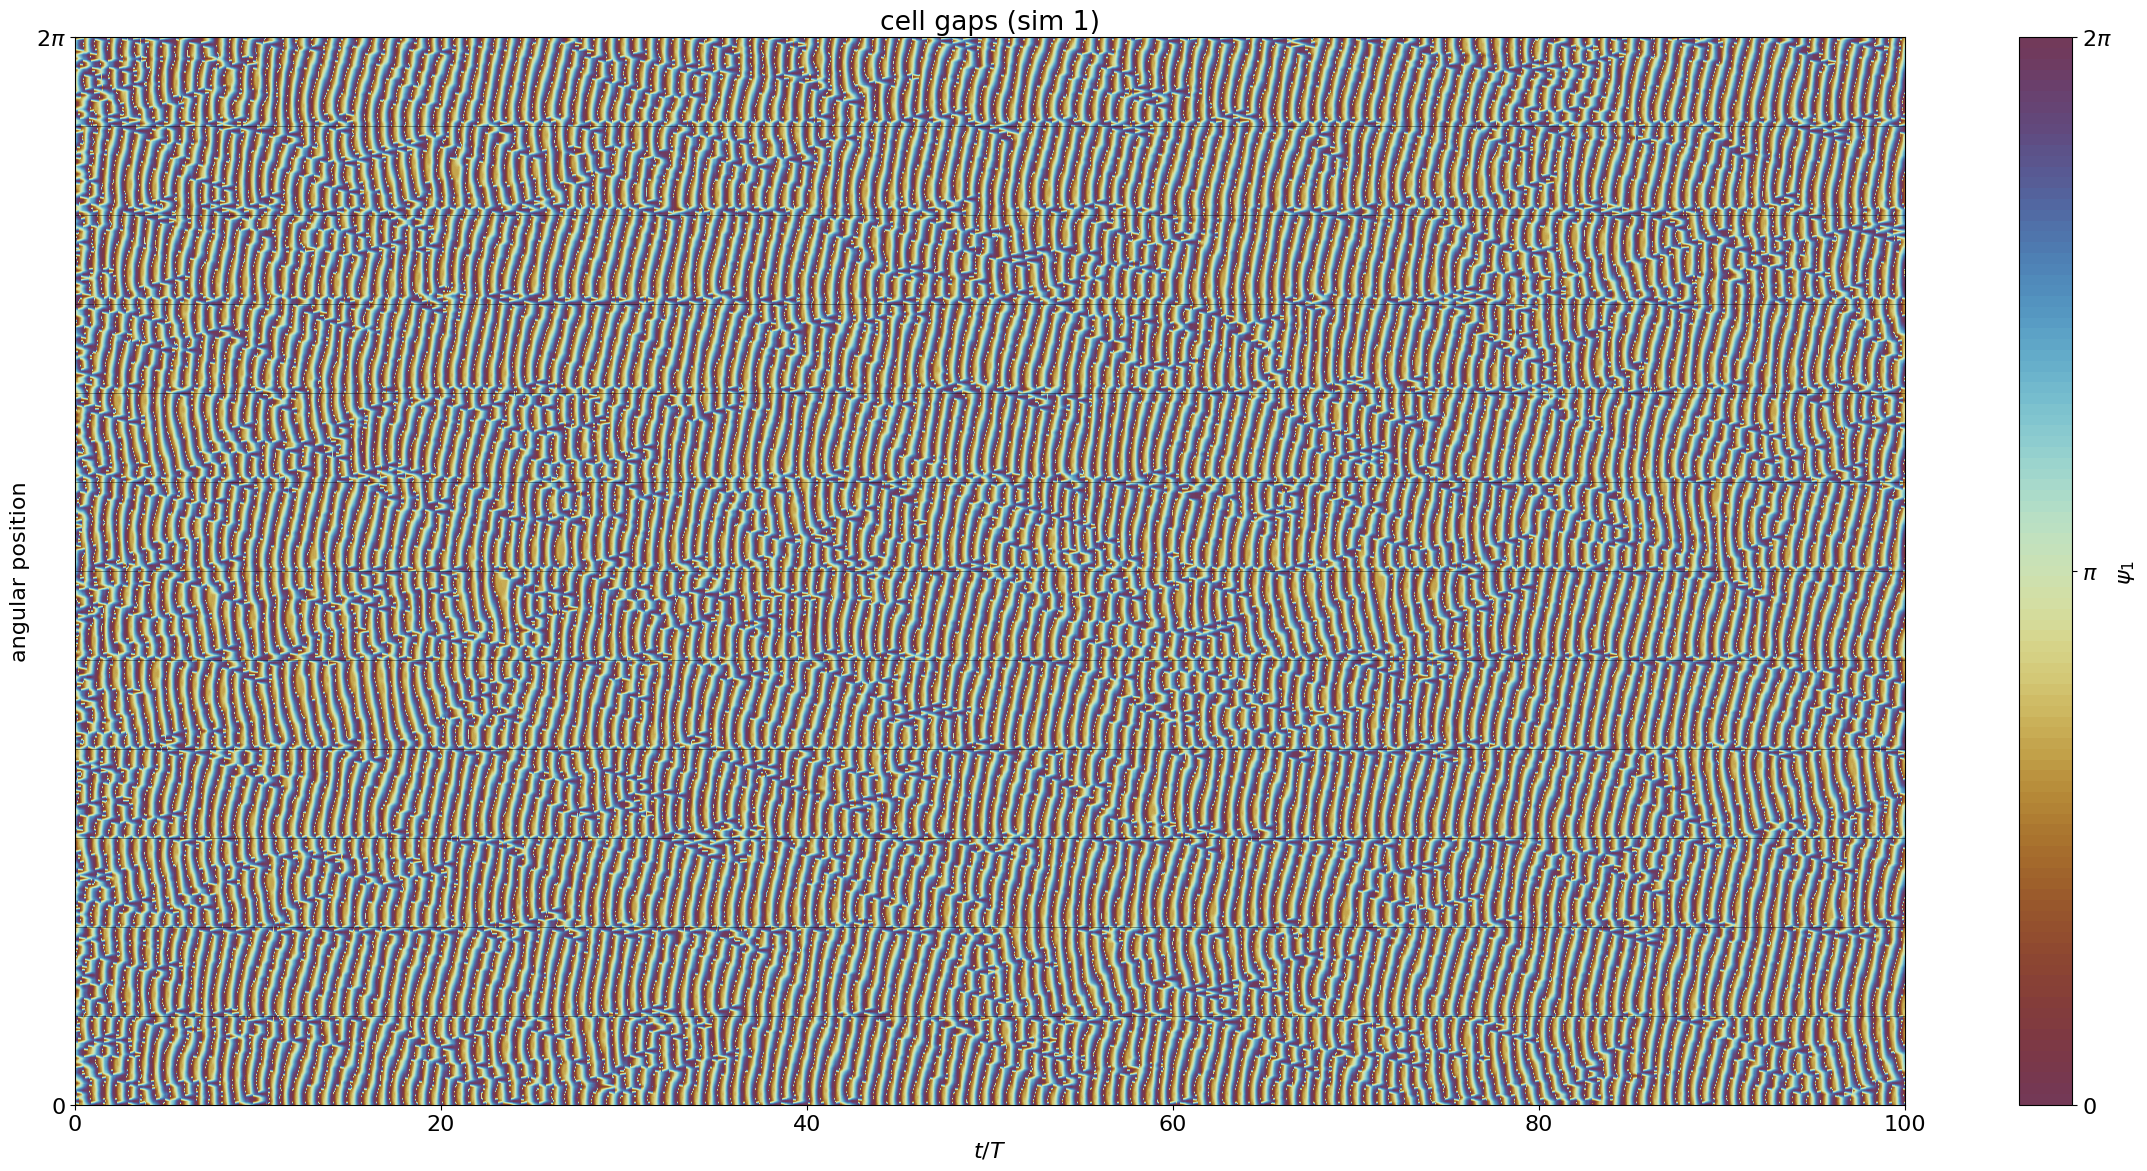

KeyboardInterrupt: 

In [ ]:
# --- Create Kymograph Plots ---
total_sims = len(files)

if total_sims == 0:
    print("No simulation files found.")
else:
    plt.rcParams.update({"font.size": 16})

    # Plotting function
    def plot_kymograph(time, phases, title):
        fig, ax = plt.subplots(figsize=(24, 12))
        position = np.linspace(0, 2*np.pi, num_fils)
        xx, yy = np.meshgrid(time, position)
        im = ax.contourf(
            xx, yy, phases.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100)
        )

        n_sections = 12
        y0, y1 = 0.0, 2*np.pi
        for y in np.linspace(y0, y1, n_sections + 1)[1:-1]:
            ax.axhline(y, color="black", lw=1.0, alpha=1.0, zorder=5)

        
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label(r'$\psi_1$')
        cbar.set_ticks([0, np.pi, 2*np.pi])
        cbar.set_ticklabels([r'$0$', r'$\pi$', r'$2\pi$'])
        
        ax.set_xlabel(r'$t/T$')
        ax.set_ylabel('angular position')
        ax.set_title(title)
        ax.set_yticks([0, 2*np.pi])
        ax.set_yticklabels([r'$0$', r'$2\pi$'])
        
        plt.tight_layout()
        plt.show()

    # Plot all 'with tilt' simulations
    for i in range(total_sims):
        params = get_params_from_path(files[i])
        title = f'cell gaps (sim {i+1})'
        plot_kymograph(times[i], phases[i], title)

    plt.rcParams.update(plt.rcParamsDefault)